# <font color='red'>Multiple Linear Regression </font>
## <font color='red'>Case Study for Boombikes Org - Bike-Sharing </font>

#### <font color='red'>Problem Statement:</font>

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

<font color='red'>Boombikes wants —</font>


- To understand the factors affecting the demand for these shared bikes in the American market. 

- To understand variables that are significant in predicting the demand for shared bikes

- To know the accuracy of the model, i.e. how well those variables describe the bike demands.



### Import required libraries

In [87]:
#importing NumPy and Pandas to read the dataset
import numpy as np
import pandas as pd

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

## <font color='blue'>Step 1: Import & Understand the Data</font>

In [88]:
bike_sharing = pd.read_csv('/day.csv', index_col=0)

# Check the head of the dataset
bike_sharing.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [89]:
bike_sharing.shape

(730, 15)

In [90]:
# No Missing value FOUND in the dataset
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 91.2+ KB


In [91]:
#Observe unique value counts for all the columns
for col in bike_sharing.columns:
    print(col, bike_sharing[col].nunique())

dteday 730
season 4
yr 2
mnth 12
holiday 2
weekday 7
workingday 2
weathersit 3
temp 498
atemp 689
hum 594
windspeed 649
casual 605
registered 678
cnt 695


## <font color='green'>Observations</font>

1. Dropping columns <br>
        - <b>casual, registered</b> since the sum of them is in <b>cnt</b> column<br>
        - <b>dteday</b> since we have the yr, mnth & weekday columns already with individual values<br><br>
2. Convert below columns to Categorical values<br>
        <b>season</b> : season (1:spring, 2:summer, 3:fall, 4:winter),<br>
        <b>mnth</b> : month ( 1 to 12),<br>
        <b>weekday</b> : day of the week (0 to 6)<br>
        <b>weathersit</b> : <br>
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy<br>
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist<br>
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds<br>
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

## <font color='blue'>Step 2: Data Cleanup</font>

Based on above observations, drop the columns that are not useful & convert columns to categorical

In [92]:
#Dropping Columns
bike_sharing.drop(['casual', 'registered', 'dteday'], axis=1, inplace=True)
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
instant,,,,,,,,,,,,
1,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
2,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
3,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
4,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
5,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [93]:
def season_values_conversion(value):
    cat_season_value = ''
    match value:
        case 1:
            cat_season_value = 'spring'
        case 2:
            cat_season_value = 'summer'
        case 3:
            cat_season_value = 'fall'
        case 4:
            cat_season_value = 'winter'
    return cat_season_value

def weathersit_values_conversion(value):
    cat_weathersit_value = ''
    match value:
        case 1:
            cat_weathersit_value = 'Clear'
        case 2:
            cat_weathersit_value = 'Mist + Cloudy'
        case 3:
            cat_weathersit_value = 'Light Snow'
        case 4:
            cat_weathersit_value = 'Heavy Rain'
    return(cat_weathersit_value)

month_values_dict = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug',
                        9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
day_values_dict = {0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'}

In [94]:
#Convert columns to Categorical values
bike_sharing['season'] = bike_sharing['season'].apply(season_values_conversion)
bike_sharing['weathersit'] = bike_sharing['weathersit'].apply(weathersit_values_conversion)
bike_sharing['mnth'] = bike_sharing['mnth'].apply(lambda value: month_values_dict[value])
bike_sharing['weekday'] = bike_sharing['weekday'].apply(lambda value: day_values_dict[value])
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
instant,,,,,,,,,,,,
1,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
2,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
3,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
4,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
5,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


## <font color='blue'>Step 3: Visualising the Data</font>

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualising Numeric Variables - Bivariate Analysis

Let's make a pairplot of all the numeric variables

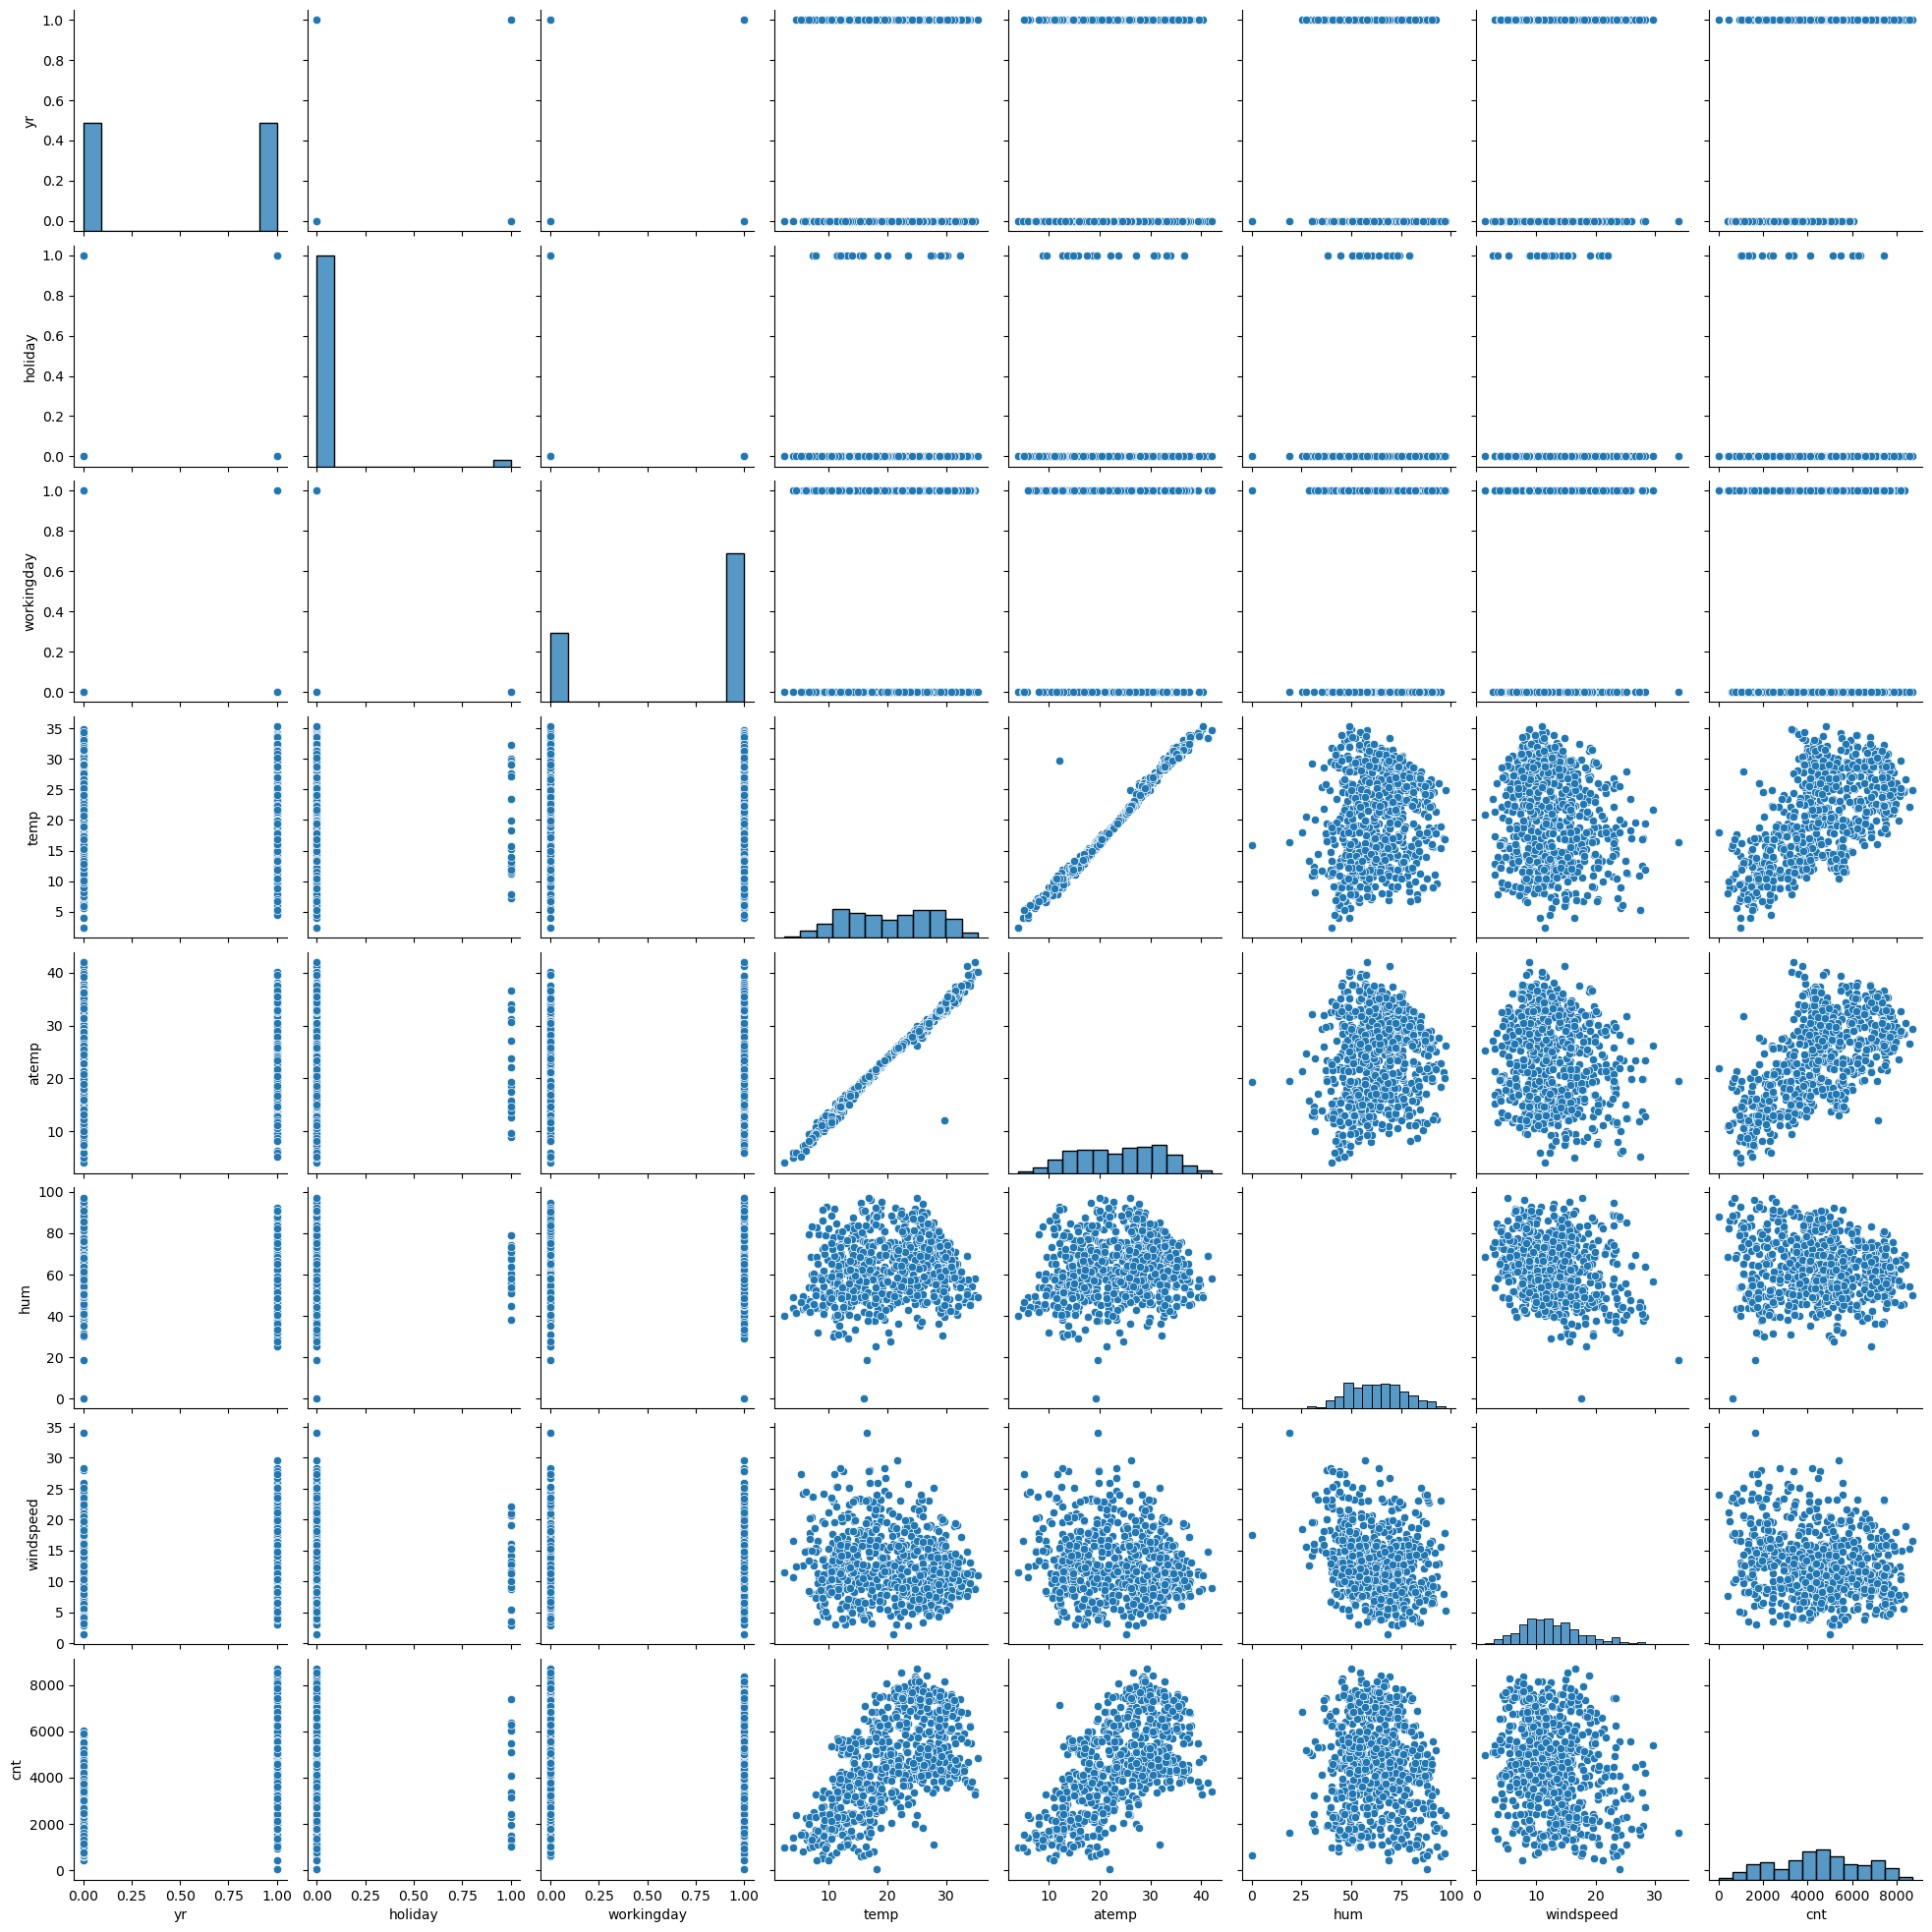

In [96]:
sns.pairplot(bike_sharing)
plt.show()

#### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

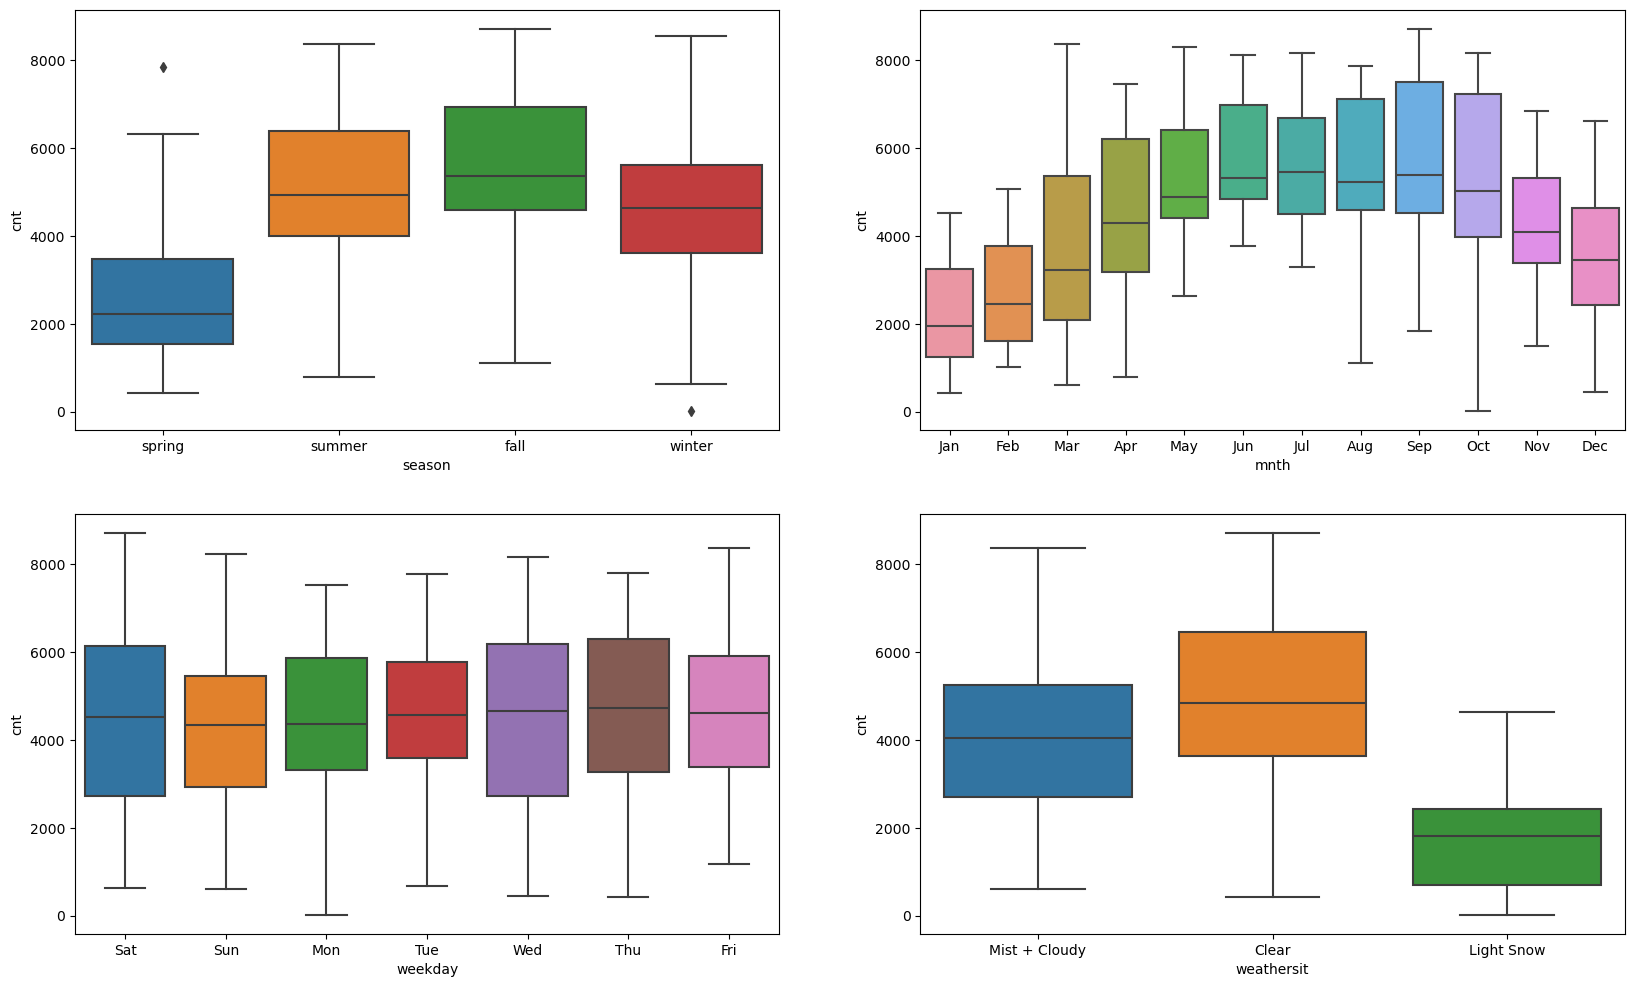

In [97]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_sharing)
plt.subplot(2,2,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_sharing)
plt.subplot(2,2,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_sharing)
plt.subplot(2,2,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_sharing)
plt.show()

#### Multivariate Analysis

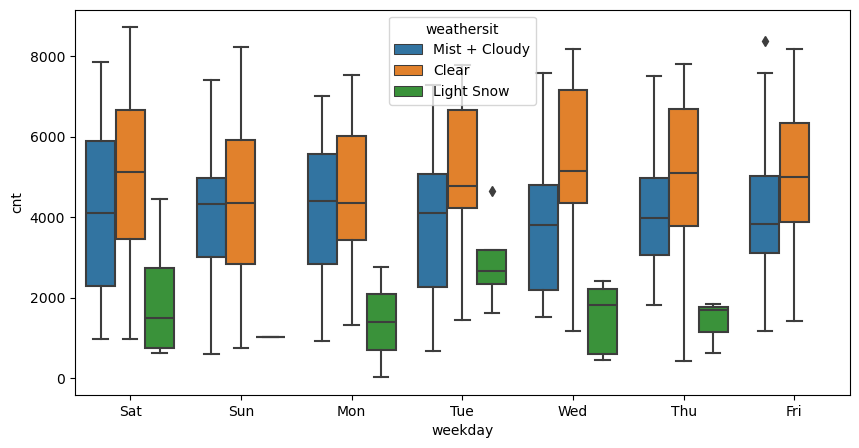

In [98]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'weekday', y = 'cnt', hue = 'weathersit', data = bike_sharing)
plt.show()

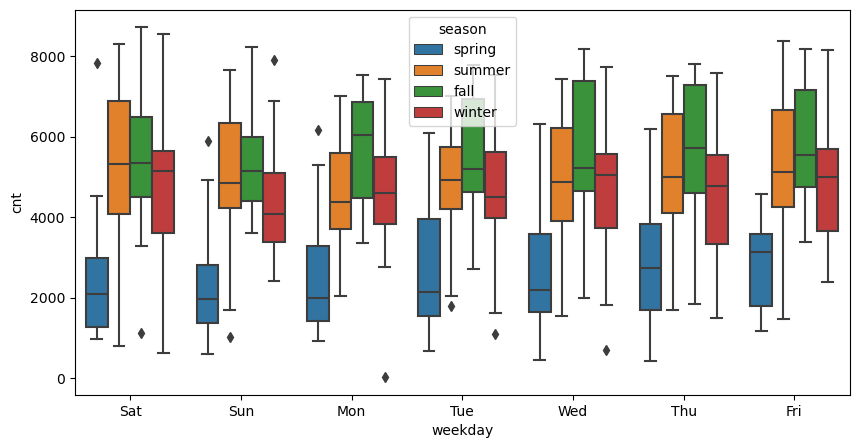

In [99]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'weekday', y = 'cnt', hue = 'season', data = bike_sharing)
plt.show()

## <font color='blue'>Step 4: Data Preparation - Creating Dummies</font>

The variables `season`, `mnth`, `weekday`, and `weathersit` have multiple levels. So we create `dummy variables`.

In [100]:
# Get the dummy variables for the feature 'season' and store it in a new variable - 'season_dummies'
season_dummies = pd.get_dummies(bike_sharing['season'], dtype='int', drop_first = True)

In [101]:
# Check what the dataset 'season_dummies' looks like
season_dummies.head()

,spring,summer,winter
instant,,,
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,1,0,0


In [102]:
# Add the results to the original dataframe
bike_sharing = pd.concat([bike_sharing, season_dummies], axis = 1)
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
instant,,,,,,,,,,,,,,,
1,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985,1,0,0
2,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801,1,0,0
3,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
4,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
5,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


In [103]:
# Get the dummy variables for the feature 'mnth' and store it in a new variable - 'mnth_dummies'
mnth_dummies = pd.get_dummies(bike_sharing['mnth'], dtype='int', drop_first = True)

# Check what the dataset 'mnth_dummies' looks like
mnth_dummies.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
instant,,,,,,,,,,,
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0
5,0,0,0,1,0,0,0,0,0,0,0


In [104]:
# Add the results to the original dataframe
bike_sharing = pd.concat([bike_sharing, mnth_dummies], axis = 1)
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
instant,,,,,,,,,,,,,,,,,,,,,
1,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,0,0
2,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,0,0
4,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,...,0,0,1,0,0,0,0,0,0,0
5,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,1,0,0,0,0,0,0,0


In [105]:
# Get the dummy variables for the feature 'weekday' and store it in a new variable - 'weekday_dummies'
weekday_dummies = pd.get_dummies(bike_sharing['weekday'], dtype='int', drop_first = True)

# Check what the dataset 'weekday_dummies' looks like
weekday_dummies.head()

,Mon,Sat,Sun,Thu,Tue,Wed
instant,,,,,,
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,1,0,0,0,0,0
4,0,0,0,0,1,0
5,0,0,0,0,0,1


In [106]:
# Add the results to the original dataframe
bike_sharing = pd.concat([bike_sharing, weekday_dummies], axis = 1)
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
instant,,,,,,,,,,,,,,,,,,,,,
1,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,...,0,0,0,0,0,1,0,0,0,0
2,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,1,0,0,0
3,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,1,0,0,0,0,0
4,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,0,1,0
5,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,1


In [107]:
# Get the dummy variables for the feature 'weathersit' and store it in a new variable - 'weathersit_dummies'
weathersit_dummies = pd.get_dummies(bike_sharing['weathersit'], dtype='int', drop_first = True)

# Check what the dataset 'weathersit_dummies' looks like - Since there are no records with weathersit value 4, 
# the resulting columns are only 2 and 00 - indicates weathersit value CLEAR (1) 
weathersit_dummies.head()

,Light Snow,Mist + Cloudy
instant,,
1,0,1
2,0,1
3,0,0
4,0,0
5,0,0


In [108]:
# Add the results to the original dataframe
bike_sharing = pd.concat([bike_sharing, weathersit_dummies], axis = 1)
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy
instant,,,,,,,,,,,,,,,,,,,,,
1,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,...,0,0,0,1,0,0,0,0,0,1
2,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,...,0,0,0,0,1,0,0,0,0,1
3,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,0,0
4,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,1,0,0,0
5,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,1,0,0


#### Drop the columns `season`, `mnth`, `weekday`, and `weathersit` since we have created the required dummies and merged into original dataframe already

In [109]:
#Dropping Columns
bike_sharing.drop(['season', 'mnth', 'weekday', 'weathersit'], axis=1, inplace=True)
bike_sharing.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy
instant,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
3,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
5,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


## <font color='blue'>Step 5: Splitting the Data into Train and Testing Sets</font>

As you know, the first basic step for regression is performing a train-test split.

In [110]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bike_sharing, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features using Min-Max scaling 

In [111]:
from sklearn.preprocessing import MinMaxScaler

In [112]:
scaler = MinMaxScaler()

In [113]:
# Apply scaler() to all the columns except the '0-1' values and 'dummy' variables
num_columns = ['temp','atemp', 'hum', 'windspeed', 'cnt']

df_train[num_columns] = scaler.fit_transform(df_train[num_columns])

In [114]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy
instant,,,,,,,,,,,,,,,,,,,,,
654,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,0,1,0,0,0
577,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,0,0
427,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,0,1
729,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,0
483,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,0,1


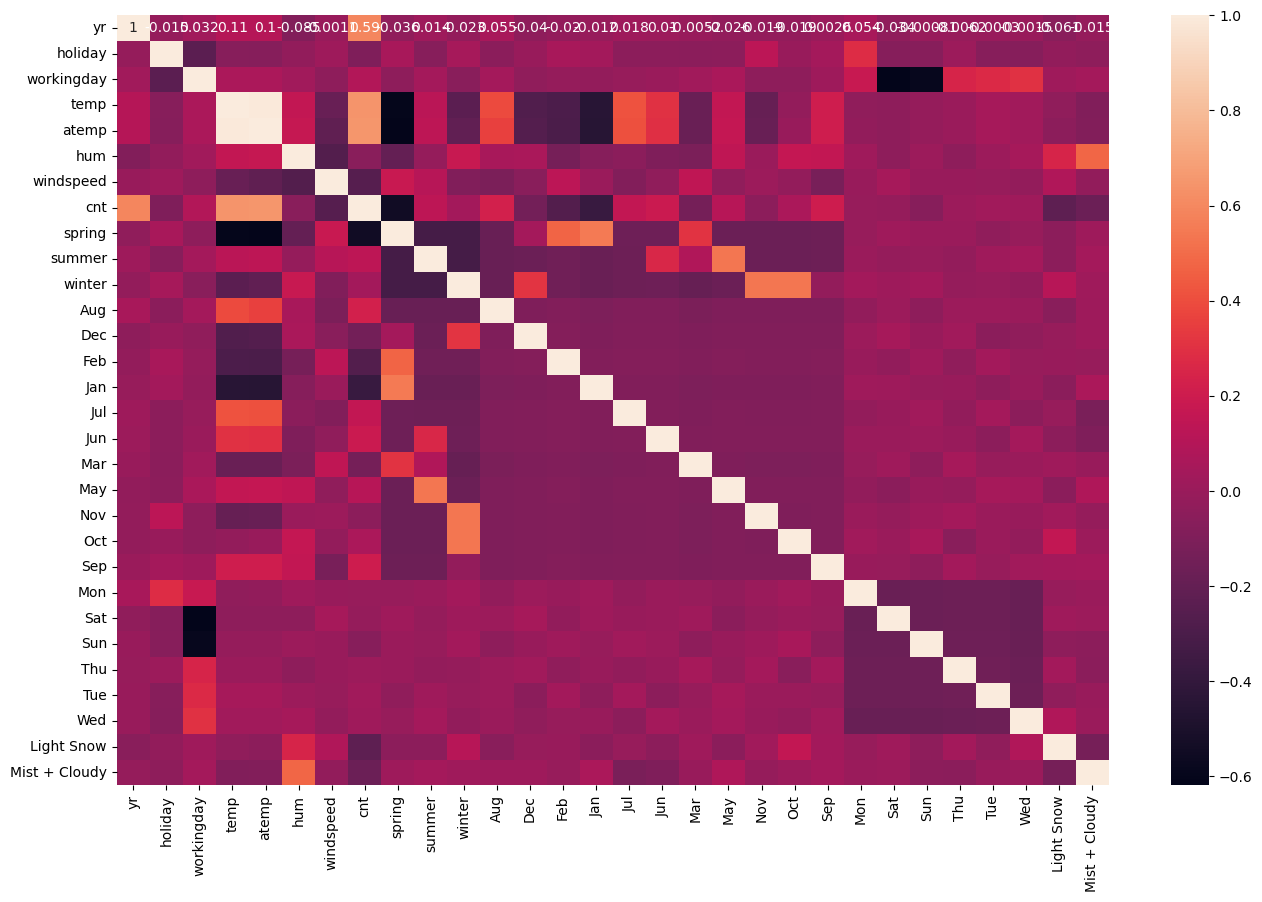

In [115]:
# Now check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True)
plt.show()

#### Since we have so many columns let's first use RFE to select few features & then drop further features using Manual elimination

### Dividing into X and Y sets for the model building

In [116]:
y_train = df_train.pop('cnt')
X_train = df_train

## <font color='blue'>Step 6: Building the linear model</font>

Fit a regression line through the training data using `statsmodels`. 

In [117]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_model = sm.OLS(y_train, X_train_lm).fit()

In [118]:
# Check the parameters obtained
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     99.96
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          8.42e-181
Time:                        08:16:46   Log-Likelihood:                 528.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     481   BIC:                            -875.3
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2452      0.035      6.953

## Observation
#### Out of the 30 features overall, Using RFE trying to bring down the count of features to 15 and then using Manual feature elimiation using VIF trying to bring down the features count to 10

## RFE

In [119]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [120]:
lm = LinearRegression()
lm.fit(X_train,y_train)

rfe = RFE(estimator=lm, n_features_to_select=10)
rfe = rfe.fit(X_train,y_train)

In [121]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 11),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 6),
 ('winter', False, 5),
 ('Aug', False, 13),
 ('Dec', False, 9),
 ('Feb', False, 10),
 ('Jan', False, 7),
 ('Jul', False, 2),
 ('Jun', False, 16),
 ('Mar', False, 17),
 ('May', False, 12),
 ('Nov', False, 8),
 ('Oct', False, 19),
 ('Sep', False, 4),
 ('Mon', False, 14),
 ('Sat', True, 1),
 ('Sun', True, 1),
 ('Thu', False, 20),
 ('Tue', False, 15),
 ('Wed', False, 18),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', False, 3)]

In [122]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'Sat', 'Sun', 'Light Snow'],
      dtype='object')

In [123]:
 X_train.columns[~rfe.support_]

Index(['atemp', 'summer', 'winter', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun',
       'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Mon', 'Thu', 'Tue', 'Wed',
       'Mist + Cloudy'],
      dtype='object')

### Building model using StatsModel for the detailed statstics 

In [124]:
X_trian_rfe =  X_train[col]

In [126]:
import statsmodels.api as sm
X_trian_rfe = sm.add_constant(X_trian_rfe)

In [127]:
lm = sm.OLS(y_train,X_trian_rfe).fit()

In [128]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     238.4
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          1.40e-174
Time:                        08:16:49   Log-Likelihood:                 463.33
No. Observations:                 510   AIC:                            -906.7
Df Residuals:                     500   BIC:                            -864.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3308      0.024     13.513      0.0

In [129]:
X_trian_rfe.columns


Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'spring', 'Sat', 'Sun', 'Light Snow'],
      dtype='object')

In [130]:
X_trian_new = X_trian_rfe.drop(['const'],axis=1)

In [131]:
## VIF caliculation 

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
x = X_trian_new
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
2,workingday,32.60
7,Sat,8.04
8,Sun,7.69
1,holiday,2.13
3,temp,1.63
6,spring,1.62
4,hum,1.21
5,windspeed,1.14
9,Light Snow,1.10
0,yr,1.03


In [132]:
## VIF hum & temp are high >10 so droping 

X_trian_new.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'Sat', 'Sun', 'Light Snow'],
      dtype='object')

#### Dropping the columns `workingday`, `Sat`,`Sun` since the VIF is so high

In [133]:
X_trian_new = X_trian_new.drop(['workingday','Sat','Sun'],axis=1)
X_trian_new.columns

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'Light Snow'], dtype='object')

In [134]:
X_trian_rfe_new = X_trian_new[X_trian_new.columns]
X_trian_rfe_new

,yr,holiday,temp,hum,windspeed,spring,Light Snow
instant,,,,,,,
654,1,0,0.509887,0.575354,0.300794,0,0
577,1,0,0.815169,0.725633,0.264686,0,0
427,1,0,0.442393,0.640189,0.255342,1,0
729,1,0,0.245101,0.498067,0.663106,1,0
483,1,0,0.395666,0.504508,0.188475,0,0
...,...,...,...,...,...,...,...
527,1,0,0.824514,0.605840,0.355596,0,0
579,1,0,0.863973,0.679690,0.187140,0,0
54,0,0,0.202618,0.435939,0.111379,1,0


In [135]:

X_trian_rfe_new = sm.add_constant(X_trian_rfe_new)
lm = sm.OLS(y_train,X_trian_rfe_new).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     299.5
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          1.10e-174
Time:                        08:16:54   Log-Likelihood:                 457.74
No. Observations:                 510   AIC:                            -899.5
Df Residuals:                     502   BIC:                            -865.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4375      0.030     14.424      0.0

In [136]:
X_trian_rfe_new.columns


Index(['const', 'yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring',
       'Light Snow'],
      dtype='object')

In [137]:
##X_trian_rfe_new = X_trian_rfe_new.drop(['const'],axis=1)

In [138]:
X_trian_rfe_new

,const,yr,holiday,temp,hum,windspeed,spring,Light Snow
instant,,,,,,,,
654,1.0,1,0,0.509887,0.575354,0.300794,0,0
577,1.0,1,0,0.815169,0.725633,0.264686,0,0
427,1.0,1,0,0.442393,0.640189,0.255342,1,0
729,1.0,1,0,0.245101,0.498067,0.663106,1,0
483,1.0,1,0,0.395666,0.504508,0.188475,0,0
...,...,...,...,...,...,...,...,...
527,1.0,1,0,0.824514,0.605840,0.355596,0,0
579,1.0,1,0,0.863973,0.679690,0.187140,0,0
54,1.0,0,0,0.202618,0.435939,0.111379,1,0


## Residual Analysis of the train data

In [139]:
X_trian_rfe_new.shape

(510, 8)

In [140]:
X_trian_rfe_new.columns

Index(['const', 'yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring',
       'Light Snow'],
      dtype='object')

In [141]:
y_train.shape

(510,)

In [142]:
y_train_pred = lm.predict(X_trian_rfe_new)

In [143]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Figure size 640x480 with 0 Axes>

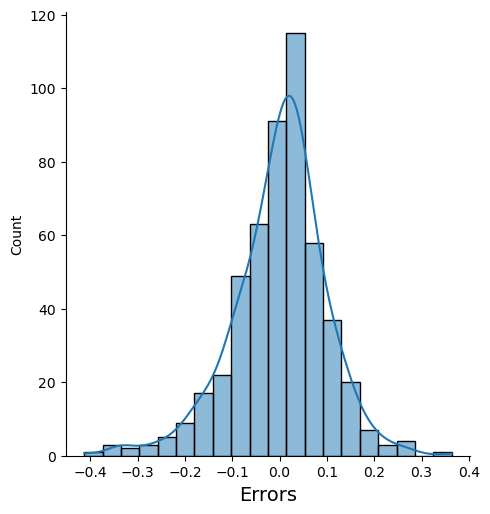

In [144]:
fig = plt.figure()
sns.displot(y_train - y_train_pred,bins=20,kde=True)
plt.xlabel('Errors',fontsize=14)
plt.show()

## Making Predections

### Applying scaling on test set

In [145]:

# Apply scaler() to all the columns except the '0-1' values and 'dummy' variables
num_columns = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_test[num_columns] = scaler.transform(df_test[num_columns])

### Deviding into X_test,y_test

In [146]:
y_test = df_test.pop('cnt')
X_test = df_test

In [147]:
X_trian_rfe_new1 = X_trian_rfe_new.drop(['const'], axis=1)
X_trian_rfe_new1

,yr,holiday,temp,hum,windspeed,spring,Light Snow
instant,,,,,,,
654,1,0,0.509887,0.575354,0.300794,0,0
577,1,0,0.815169,0.725633,0.264686,0,0
427,1,0,0.442393,0.640189,0.255342,1,0
729,1,0,0.245101,0.498067,0.663106,1,0
483,1,0,0.395666,0.504508,0.188475,0,0
...,...,...,...,...,...,...,...
527,1,0,0.824514,0.605840,0.355596,0,0
579,1,0,0.863973,0.679690,0.187140,0,0
54,0,0,0.202618,0.435939,0.111379,1,0


In [148]:
X_test_new = X_test[X_trian_rfe_new1.columns]
X_test_new = sm.add_constant(X_test_new)

In [149]:
y_test_pred = lm.predict(X_test_new)

## Model Evalution

Text(0, 0.5, 'y_test_pred')

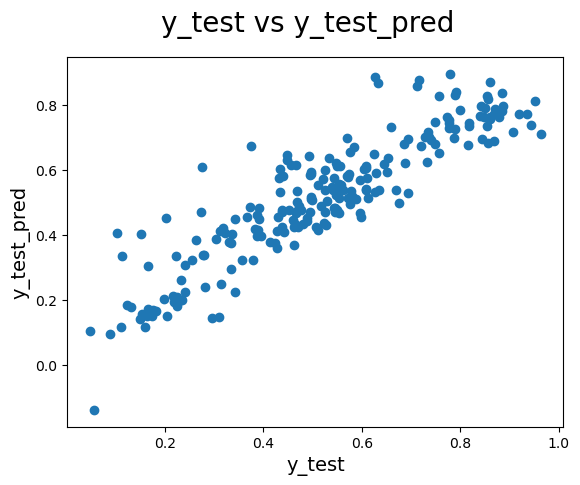

In [150]:
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred',fontsize=20)
plt.xlabel('y_test',fontsize=14)
plt.ylabel('y_test_pred',fontsize=14)

In [151]:
X_test_rfe_new1 = sm.add_constant(X_test_new)
lm = sm.OLS(y_test,X_test_rfe_new1).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     130.3
Date:                Wed, 31 Jul 2024   Prob (F-statistic):           5.44e-73
Time:                        08:17:12   Log-Likelihood:                 205.96
No. Observations:                 219   AIC:                            -395.9
Df Residuals:                     211   BIC:                            -368.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4598      0.046     10.046      0.0

In [152]:
# Overall the R-square & Adj R-sqaure are above 80%
# The feature left & thier coefficients are  = yr *0.2369 + holiday*-0.0741 + temp*0.3399 + hum*-0.2359 
#    + windspeed*-0.1067 + spring*-0.2045 + Light Snow*-0.1349

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)